In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
import re

sns.set()


def gethighest(vals, prefix="logall_"):
        m = np.argmax([int(re.search(f'{prefix}(\d+)', val).group(1)) for val in vals])
        return vals[m]

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

        
def readparams(file):
    params = {} 
    with open(file) as f:
        for line in f:
            line = line[:-1]  # remove \n
            if not line or line.startswith('#') or line.startswith('import'):
                continue
            key, val = line.split('=')
            if val.lower() == 'true' or val.lower() == 'false':
                params[key] = val.lower() == 'true'
            else:
                try:
                    params[key] = float(val)
                except ValueError:
                    params[key] = val
    return params

In [149]:
params = []
for path in sorted(glob.glob("../../../../logs/lions-maxtwo**-2019-06-19*/**/rep00/", recursive=True) 
                   + glob.glob("../../../../logs/lions-maxtwo*-2019-06-15*/**/rep00/", recursive=True)
                  + glob.glob("../../../../logs/lions-maxtwo*-2019-06-14*/**/rep00/", recursive=True)
                   + glob.glob("../../../../logs/lions-maxtwo*-2019-06-13*/**/rep00/", recursive=True)
                  + glob.glob("../../../../logs/lions-maxtwo**-2019-06-20*/**/rep00/", recursive=True)):
    print(path)
    try:
        logall = read_csvx(gethighest(glob.glob(path + 'logall*')), delimiter="\t")
    except Exception as e:
        print(e)
        continue
    print('*-*-*')
    params.append((path, readparams(glob.glob(path + 'properties*')[0]), logall.query('nbOnOpp == 2')['curCoopNoCoef'].mean()))



../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b10-nocost-decay-1000-2019-06-14-1742/lion_big/o120/mt_true/run_01/rep00/
*-*-*
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b10-nocost-decay-1000-2019-06-14-1742/lion_big/o120/mt_true/run_02/rep00/
*-*-*
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b10-nocost-decay-500-2019-06-15-0459/lion_big/o120/mt_true/run_01/rep00/
*-*-*
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b10-nocost-decay-500-2019-06-15-0459/lion_big/o120/mt_true/run_02/rep00/
*-*-*
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b3-nocost-decay-1000-2019-06-14-1744/lion_big/o120/mt_true/run_01/rep00/
*-*-*
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b3-nocost-decay-1000-2019-06-14-1744/lion_big/o120/mt_true/run_02/rep00/
*-*-*
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-fake_true-0.1-b3-nocost-decay-500-2019-06-14-1744/lion_big/o12

In [162]:
diffkeys = []
for key in params[-1][1].keys():
    if any(params[i][1][key] != params[0][1][key] for i in range(0, len(params) - 1)):
        diffkeys.append(key)

In [163]:
excluded = ['gSeed', 'gLogFilename', 'path']
processed = []
for elem in params:
    param = elem[1]
    ess = param['meanA'] / 2
    so = param['meanA'] + param['b'] / 2
    outdict = {'coop': (elem[2] - ess) / (so - ess) , 'truecoop': elem[2]}
    for key in diffkeys:
        if key in excluded: continue
        outdict[key] = elem[1][key]
    processed.append(outdict)
df = pd.DataFrame(processed)
normalized_df=(df-df.mean())/df.std()

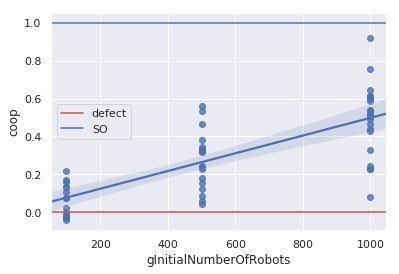

In [164]:
sns.regplot(x='gInitialNumberOfRobots', y='coop', data=df)
plt.axhline(0, label='defect', c='r')
plt.axhline(1, label='SO', c='b')
plt.legend()

In [165]:
import statsmodels.formula.api as sm

In [166]:
normalized_df['nbRobots'] = normalized_df['gInitialNumberOfRobots']
normalized_df['tau'] = normalized_df['oppDecay']
normalized_df['coopVariability'] = normalized_df['fakeCoef']
normalized_df

,b,coop,fakeCoef,gInitialNumberOfRobots,gNbOfPhysicalObjects,gRandomSeed,logEveryXGen,oppDecay,truecoop,nbRobots,tau,coopVariability
0,0.750950,-1.469908,-0.739273,-1.356568,-1.570501,1.636666,0.869955,0.759830,-1.344769,-1.356568,0.759830,-0.739273
1,0.750950,-1.424142,-0.739273,-1.356568,-1.570501,1.636666,0.869955,0.759830,-1.292196,-1.356568,0.759830,-0.739273
2,0.750950,-0.652312,-0.739273,-1.356568,-1.570501,0.240365,0.869955,-1.291711,-0.405570,-1.356568,-1.291711,-0.739273
3,0.750950,-1.466297,-0.739273,-1.356568,-1.570501,0.240366,0.869955,-1.291711,-1.340621,-1.356568,-1.291711,-0.739273
4,-0.861886,-1.532479,-0.739273,-1.356568,-1.570501,-0.874040,0.869955,0.759830,-1.318017,-1.356568,0.759830,-0.739273
5,-0.861886,-0.892765,-0.739273,-1.356568,-1.570501,-0.874041,0.869955,0.759830,-0.926091,-1.356568,0.759830,-0.739273
6,-0.861886,-0.763776,-0.739273,-1.356568,-1.570501,-0.853297,0.869955,-1.291711,-0.847065,-1.356568,-1.291711,-0.739273
7,-0.861886,-1.367059,-0.739273,-1.356568,-1.570501,-0.853297,0.869955,-1.291711,-1.216671,-1.356568,-1.291711,-0.739273
8,0.750950,-1.018719,-0.355420,-1.356568,-1.570501,1.096303,0.869955,-1.291711,-0.826473,-1.356568,-1.291711,-0.355420
9,0.750950,-1.254086,-0.355420,-1.356568,-1.570501,1.096303,0.869955,-1.291711,-1.096847,-1.356568,-1.291711,-0.355420


In [159]:
result = sm.ols(formula="coop ~ nbRobots + b + tau + coopVariability", data=normalized_df).fit()

In [160]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coop   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     17.46
Date:                Fri, 21 Jun 2019   Prob (F-statistic):           5.75e-09
Time:                        11:35:49   Log-Likelihood:                -52.194
No. Observations:                  54   AIC:                             114.4
Df Residuals:                      49   BIC:                             124.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.498e-16      0.091   2.75e-15      1.000      -0.183       0.183
nbRobots            0.7295      0.099      7.400      0.000       0.531       0.928
b                   0.1130      0.094      1.207      0.233      -0.075       0.301
tau                 0.0860      0.096      0.897      0.374      -0.107       0.279
coopVariability     0.0801      0.100      0.803      0.426      -0.120       0.281
==============================================================================
Omnibus:                        2.347   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.309   Jarque-Bera (JB):                1.459
Skew:                           0.294   Prob(JB):                        0.482
Kurtosis:                       3.549   Cond. No.                         1.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
df.query('gInitialNumberOfRobots == 1000 and b == 10')

,b,coop,fakeCoef,gInitialNumberOfRobots,gNbOfPhysicalObjects,gRandomSeed,logEveryXGen,oppDecay,truecoop
14,10.0,0.598243,0.1,1000.0,720.0,-1.386321e+09,100.0,1000.0,6.986820
15,10.0,0.429166,0.1,1000.0,720.0,-1.386321e+09,100.0,1000.0,5.718742
16,10.0,0.616049,0.1,1000.0,720.0,-1.776713e+09,100.0,500.0,7.120371
17,10.0,0.326368,0.1,1000.0,720.0,-1.776713e+09,100.0,500.0,4.947763
